In [2]:
import mani_rain
import numpy as np
import matplotlib.pyplot as plt


Text(0, 0.5, 'Probability')

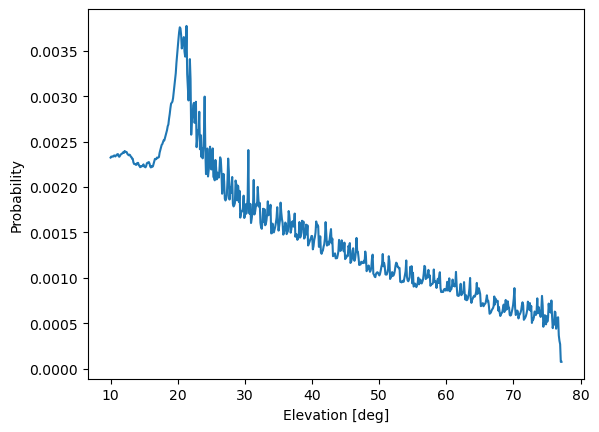

In [3]:
station_elevation_file = "/home/jonasj2001/Documents/uni/ES8/project/link_budget/CB11_elevations.pickle"

ceb = mani_rain.cebreros
ceb.el_dist(station_elevation_file)

plt.plot(*ceb.el_distribution)
plt.xlabel("Elevation [deg]")
plt.ylabel("Probability")

In [4]:

link = mani_rain.link_budget_itu(ceb, 100e6)
def snr_eqv_p(link: mani_rain.link_budget_itu):
    print(f"Probability exceeded: {link.rain_model.p}")
    print(f"Equivalent rain rate: {link.rain_model.rain_rate}")
    dist = 384400e3
    snr_link = link.snr_eqv(dist)
    shannon_rate = link.shannon_cap(snr_link)

    target_rate = 100e6 # 100 Mbit
    power_for_rate = link.shannon_power_at_cap(target_rate)

    print(f"SNR: {snr_link}")
    print(f"Availble Shannon rate {shannon_rate/1e6:.2f} Mbit")
    print(f"SNR needed for 100 Mbit/s {power_for_rate} dB")



In [5]:
# Find Eqv. Rate / SNR for outage probability:
link.rain_model.p = 0.01
snr_eqv_p(link)
print("-----")
link.rain_model.p = 0.1
snr_eqv_p(link)
print("-----")
link.rain_model.p = 1
snr_eqv_p(link)

Probability exceeded: 0.01
Equivalent rain rate: 26.887524654011365
SNR: -17.645068008044536
Availble Shannon rate 2.46 Mbit
SNR needed for 100 Mbit/s 0.0 dB
-----
Probability exceeded: 0.1
Equivalent rain rate: 8.64014774570842
SNR: 7.649960225346135
Availble Shannon rate 277.00 Mbit
SNR needed for 100 Mbit/s 0.0 dB
-----
Probability exceeded: 1
Equivalent rain rate: 1.6417130828902107
SNR: 16.687431103478733
Availble Shannon rate 557.41 Mbit
SNR needed for 100 Mbit/s 0.0 dB


In [6]:
# Find Eqv. Rate / SNR for a given rain_rate
dist = 384400e3
rain_rate = 4 #mmhr⁻¹
print(f"Rain Rate = {rain_rate} mmhr⁻¹")
snr_link = link.snr_eqv(dist, rain_rate)
shannon_rate = link.shannon_cap(snr_link)

target_rate = 100e6 # 100 Mbit
power_for_rate = link.shannon_power_at_cap(target_rate)

print(f"SNR: {snr_link}")
print(f"Availble Shannon rate {shannon_rate/1e6:.2f} Mbit")
print(f"SNR needed for 100 Mbit/s {power_for_rate} dB")

Rain Rate = 4 mmhr⁻¹
SNR: 13.680143000400601
Availble Shannon rate 460.50 Mbit
SNR needed for 100 Mbit/s 0.0 dB


Text(0, 0.5, 'SNR [dB]')

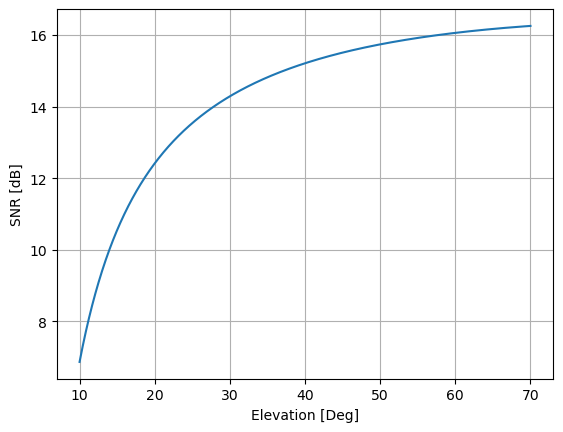

In [10]:
# Find for a specific elevation
dist = 384400e3
N = 1000
rain_rate = 4 #mmhr⁻¹
elevations = np.linspace(10, 70, N)
rain_rates = np.full(N, rain_rate)

snr_list = []
for idx, el in enumerate(elevations):
    snr_list.append(link.snr_at_t(dist, el, rain_rates[idx]))

plt.plot(elevations, snr_list)
plt.grid()
plt.xlabel("Elevation [Deg]")
plt.ylabel("SNR [dB]")